In [1]:
import numpy as np
import pandas as pd 
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")


In [2]:

df = pd.read_csv(r'C:\Users\aksin\VSP\ImmunoSense\Updated_dataset (1).csv')
df.head()
Df = pd.read_csv(r'C:\Users\aksin\OneDrive\Desktop\Diet_dataset1.csv')
Df.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Recovered,Active,Protein Score,Recovery Rate,Death Rate,Average Age,BMI,Diabetes,Sleep Hours,Population
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,0.123374,0.012574,81.719828,0.868010,0.043521,17.0,21.1,10.9,7.5,38928000
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,1.792636,1.123714,95.061006,0.604130,0.017171,32.9,26.8,9.0,7.2,2838000
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,0.167572,0.070767,87.285776,0.684256,0.026779,28.1,26.6,7.7,7.2,44357000
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,0.056808,0.003419,91.199655,0.920895,0.023677,16.3,23.2,4.6,7.0,32522000
4,Argentina,1.4354,14.9869,1.0650,0.0,16.7927,0.8643,0.2006,1.4663,9.4459,...,3.905192,0.342729,92.227529,0.896478,0.024845,31.7,27.8,12.7,7.1,45377000


In [3]:
df.shape

(154, 6)

In [4]:
df.columns = df.columns.str.replace(' ', '_')


# DecisionTreeRegressor

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split


X = df.drop(['Immunity_Score'], axis=1)
y = df['Immunity_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)


Mean Absolute Error (MAE): 1.623470487741936
Mean Squared Error (MSE): 4.006198376235682
Root Mean Squared Error (RMSE): 2.0015489942131524
R^2 Score: 0.9423924498010353


C:\Users\aksin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Gradient Boosting Regressor

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming you have your data in a DataFrame named df with columns: 'Protein_Score', 'Average_Age', 'BMI', 'Diabetes', 'Sleep_Hours', and 'Immunity_Score'

X = df.drop(['Immunity_Score'], axis=1)
y = df['Immunity_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)


Mean Absolute Error (MAE): 0.7024770511666464
Mean Squared Error (MSE): 0.7170095105962825
Root Mean Squared Error (RMSE): 0.8467641410666151
R^2 Score: 0.9896896864569094


C:\Users\aksin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Learning Curve and cross validation

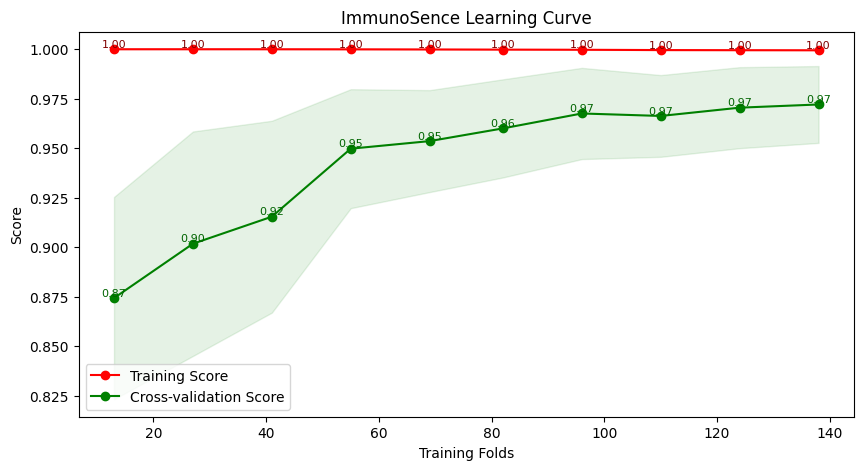

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


learning_rate = 0.1


train_sizes, train_scores, valid_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


plt.figure(figsize=(10, 5))
plt.title("ImmunoSence Learning Curve")
plt.xlabel("Training Folds")
plt.ylabel("Score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation Score")


for i, (train_score, valid_score) in enumerate(zip(train_scores_mean, valid_scores_mean)):
    plt.text(train_sizes[i], train_score, f'{train_score:.2f}', ha='center', va='bottom', fontsize=8, color='maroon')
    plt.text(train_sizes[i], valid_score, f'{valid_score:.2f}', ha='center', va='bottom', fontsize=8, color='darkgreen')

plt.legend(loc="best")
plt.show()


# Saving and Loding the GBoost Algo

In [8]:
import pickle

with open('gradient_boosting_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('gradient_boosting_regression_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


# Feature Importance

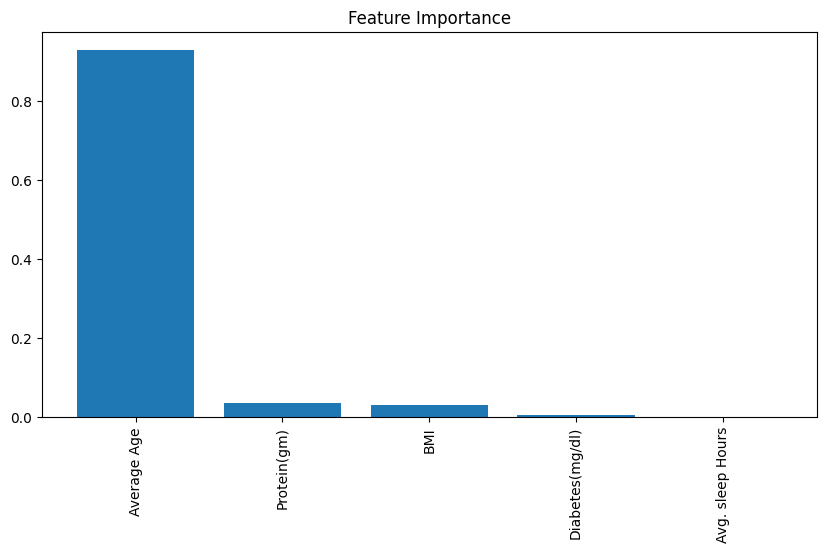

In [9]:
import matplotlib.pyplot as plt

custom_names = {
    'Protein_Score': 'Protein(gm)',
    'Average_Age': 'Average Age',
    'BMI': 'BMI',
    'Diabetes': 'Diabetes(mg/dl)',
    'Sleep_Hours': 'Avg. sleep Hours'
  
}

feature_importances = model.feature_importances_

indices = np.argsort(feature_importances)[::-1]

names = [custom_names[X.columns[i]] for i in indices]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()


# Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R^2 Score:", r2_rf)


Random Forest Metrics:
Mean Absolute Error (MAE): 0.9282968513999995
Mean Squared Error (MSE): 1.452896130598516
Root Mean Squared Error (RMSE): 1.2053614107803998
R^2 Score: 0.9791079275370332


C:\Users\aksin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Comparing the Models Result

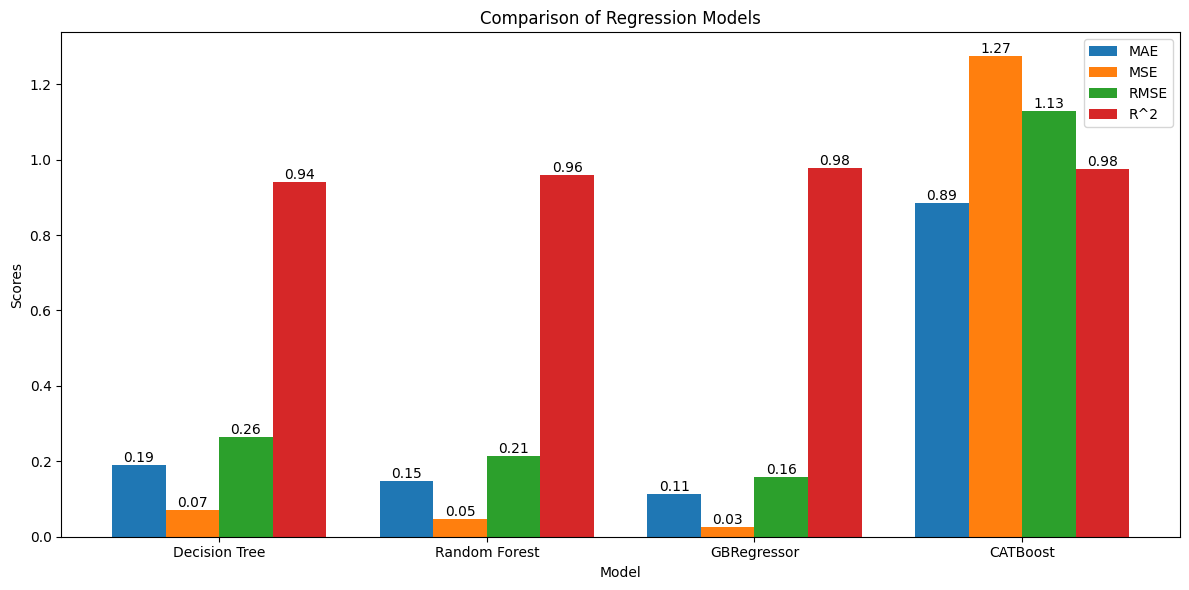

In [11]:
import matplotlib.pyplot as plt

model_scores = {
    "Decision Tree": {
        "MAE": 0.18930198250730113,
        "MSE": 0.06994211404896754,
        "RMSE": 0.2644657143165585,
        "R^2": 0.9394290286741449
    },
    "Random Forest": {
        "MAE": 0.14703040224962943,
        "MSE": 0.04572985926371626,
        "RMSE": 0.21384540973262967,
        "R^2": 0.9603972223050237
    },
    "GBRegressor": {
        "MAE": 0.11354314516015236,
        "MSE": 0.025269886537332125,
        "RMSE": 0.15896504816258233,
        "R^2": 0.9781158806296769
    },
    "CATBoost": {
        "MAE": 0.8856033570737551,
        "MSE": 1.2738844202120894,
        "RMSE": 1.1286648839279485,
        "R^2": 0.9753954247428124
    },
}

model_names = list(model_scores.keys())
metrics = list(model_scores[model_names[0]].keys())
scores = [[model_scores[model][metric] for metric in metrics] for model in model_names]

bar_width = 0.2
x = np.arange(len(model_names))
plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics):
    bars = plt.bar(x + i * bar_width, [score[i] for score in scores], bar_width, label=metric)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), 
                 ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Comparison of Regression Models')
plt.xticks(x + bar_width * (len(metrics) - 1) / 2, model_names)
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
max_immunity_score = df['Immunity_Score'].max()
print("Maximum Immunity Score:", max_immunity_score)


Maximum Immunity Score: 54.78225917


In [48]:
min_immunity_score = df['Immunity_Score'].min()
print("Minimum Immunity Score:", min_immunity_score)


Minimum Immunity Score: 14.98239927


In [50]:
mean_immunity_score = df['Immunity_Score'].mean()
median_immunity_score = df['Immunity_Score'].median()
mode_immunity_score = df['Immunity_Score'].mode().values[0]

print("Mean Immunity Score:", mean_immunity_score)
print("Median Immunity Score:", median_immunity_score)
print("Mode Immunity Score:", mode_immunity_score)


Mean Immunity Score: 28.966219417077923
Median Immunity Score: 26.727797144999997
Mode Immunity Score: 14.98239927
